<a href="https://colab.research.google.com/github/deepnov/dnutties/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the CSV file
df = pd.read_csv('data.csv')
print(df)

        Id  Tag  PosX   PosY    Width  Height Parent  Children  Inputs  Texts  \
0        1  DIV   0.0    0.0  1183.20   720.0   BODY         1       0      0   
1        2  DIV   0.0    0.0  1183.20   720.0    DIV         1       0      0   
2        3  DIV   0.0    0.0  1183.20   720.0    DIV         2       0      0   
3        4  DIV   0.0    0.0  1183.20   736.0    DIV         2       0      0   
4        5  DIV   0.0    0.0  1183.20   736.0   MAIN         1       0      0   
...    ...  ...   ...    ...      ...     ...    ...       ...     ...    ...   
2273  2274    P  32.0  259.2   535.99    29.7   FORM         2       2      2   
2274  2275    P  32.0  303.9   535.99    29.7   FORM         2       2      2   
2275  2276    P  32.0  348.6   535.99    29.7   FORM         2       2      2   
2276  2277    P  32.0  393.3   535.99    29.7   FORM         2       2      2   
2277  2278    P  32.0  438.0   535.99    70.5   FORM         1       1      1   

      Links  Lists  Images 

In [ ]:
# Select the relevant columns
df = df[['Id','Tag', 'Children', 'Links', 'Images', 'Texts']]

In [ ]:
# Convert the Tag column to numerical values
le = LabelEncoder()
df['Tag'] = le.fit_transform(df['Tag'])

In [ ]:
# Scale the numeric data columns
scaler = StandardScaler()
df[['Children', 'Links', 'Images', 'Texts']] = scaler.fit_transform(df[['Children', 'Links', 'Images', 'Texts']])


In [ ]:
# Split the data into training and test sets
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Tag', axis=1), df['Tag'], test_size=0.2, random_state=42)


In [ ]:
# Perform k-means clustering on the training data
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
#predict the labels of clusters.
# Get the cluster labels
cluster_labels = kmeans.labels_


In [ ]:
# Evaluate the model on the test data
y_pred = kmeans.predict(X_test)


In [ ]:

df['ClusterLabel'] = np.concatenate([y_train, y_pred])



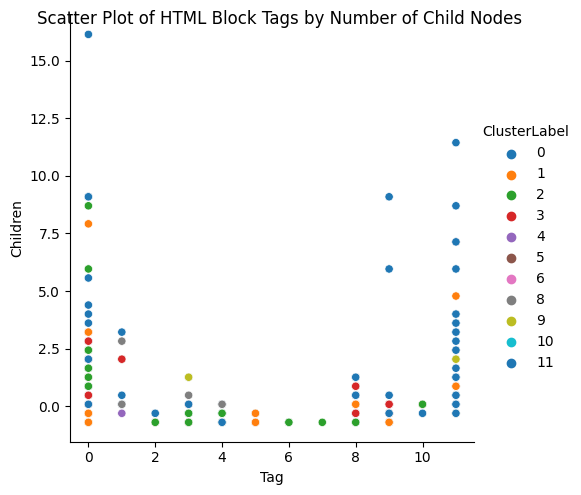

In [ ]:

#df.plot.scatter('Children', 'Texts', c='ClusterLabel', cmap='jet')

#g = sns.pairplot(df, hue='ClusterLabel', palette='viridis')
#g.fig.suptitle('Scatter Plots of HTML Element Features by Cluster')
#plt.show()

g = sns.relplot(data=df, x='Tag', y='Children', hue='ClusterLabel', palette='tab10', kind='scatter')
g.fig.suptitle('Scatter Plot of HTML Block Tags by Number of Child Nodes')
plt.show()


In [ ]:
print(le.classes_ )

['DIV' 'FORM' 'H1' 'H2' 'H3' 'H4' 'H5' 'H6' 'LI' 'P' 'TABLE' 'UL']
